In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option("display.max_columns",50)

In [3]:
path = "C:/Users/Krishna/Documents/kaggle/titanic/input"

##### Reading train csv

In [5]:
train = pd.read_csv(f'{path}/train.csv')
train.head(2)
train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


(891, 12)

In [6]:
test = pd.read_csv(f'{path}/test.csv')
test.head(2)
test.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


(418, 11)

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#dropping cabin,name,ticket
train = train.drop(['Name', 'Ticket','Cabin'], axis = 1)
test = test.drop(['Name', 'Ticket','Cabin'], axis = 1)

In [10]:
train.groupby('Sex').Age.mean()
#train.Age.dropna().groupby(train.Sex, sort = False).mean()
train.Age.isna().groupby(train.Sex, sort = False).sum()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Sex
male      124.0
female     53.0
Name: Age, dtype: float64

In [11]:
test.groupby('Sex').Age.mean()
#test.Age.dropna().groupby(test.Sex, sort = False).mean()
test.Age.isna().groupby(test.Sex, sort = False).sum()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

Sex
male      61.0
female    25.0
Name: Age, dtype: float64

In [12]:
train.loc[train.Age.isna(), 'Age'] = train[train.Age.isna()].Sex.map(train.groupby('Sex').Age.mean().to_dict())

In [13]:
test['Fare'] = test.Fare.fillna(test.Fare.mean())
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [14]:
test.loc[test.Age.isna(), 'Age'] = test[test.Age.isna()].Sex.map(train.groupby('Sex').Age.mean().to_dict())

In [15]:
train.shape
train = train.dropna(subset = ['Embarked'],axis =0)
train.shape

(891, 9)

(889, 9)

In [16]:
test.shape
test = test.dropna(subset = ['Embarked'],axis =0)
test.shape

(418, 8)

(418, 8)

In [17]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
train[['Sex','SibSp', 'Parch', 'Pclass', 'Embarked']] = train[['Sex','SibSp', 'Parch', 'Pclass', 'Embarked']].astype(str)

In [20]:
test[['Sex','SibSp', 'Parch', 'Pclass', 'Embarked']] = test[['Sex','SibSp', 'Parch', 'Pclass', 'Embarked']].astype(str)

In [21]:
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)
train_dvec = dvec.fit_transform(train[['Sex','SibSp', 'Parch', 'Pclass', 'Embarked']].transpose().to_dict().values())
train_dvec = pd.DataFrame(train_dvec, index = train.index, columns = dvec.get_feature_names())

In [23]:
def dict_vec(train_set,cols,is_test, test_set):
    """
    returns dict vectorizer on train set or train & test set for chosen columns
    train_set: Dataset on which DV is to be fit
    cols: List of columns of train_set which are to be considered for DV
    is_test: Boolean, If DV is to be transformed on test too
    test_set: Test set on which DV is to be transformed
    """
    from sklearn.feature_extraction import DictVectorizer
    import pandas as pd
    dvec = DictVectorizer(sparse=False)
    if not is_test:
        test_set = pd.DataFrame()
        train_dvec = dvec.fit_transform(train_set[cols].transpose().to_dict().values())
        train_dvec = pd.DataFrame(train_dvec, index = train_set.index, columns = dvec.get_feature_names())
        train_df = pd.concat([train_set.drop(cols, axis = 1),train_dvec], axis = 1)
        return train_df,pd.DataFrame(),dvec
    else:
        train_dvec = dvec.fit_transform(train_set[cols].transpose().to_dict().values())
        train_dvec = pd.DataFrame(train_dvec, index = train_set.index, columns = dvec.get_feature_names())
        train_df = pd.concat([train_set.drop(cols, axis = 1),train_dvec], axis = 1)
        test_dvec = dvec.transform(test_set[cols].transpose().to_dict().values())
        test_dvec = pd.DataFrame(test_dvec, index = test_set.index, columns = dvec.get_feature_names())
        test_df = pd.concat([test_set.drop(cols, axis = 1),test_dvec], axis = 1)
        return train_df, test_df,dvec

In [25]:
train_df,test_df,dv = dict_vec(train, ['Sex','SibSp', 'Parch', 'Pclass', 'Embarked'],is_test = True,test_set =test)

In [26]:
target  = 'Survived'
features= train_df.drop(['PassengerId','Survived'], axis =1).columns
target
features

'Survived'

Index(['Age', 'Fare', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Parch=0',
       'Parch=1', 'Parch=2', 'Parch=3', 'Parch=4', 'Parch=5', 'Parch=6',
       'Pclass=1', 'Pclass=2', 'Pclass=3', 'Sex=female', 'Sex=male', 'SibSp=0',
       'SibSp=1', 'SibSp=2', 'SibSp=3', 'SibSp=4', 'SibSp=5', 'SibSp=8'],
      dtype='object')

##### fitting on train set

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
sc = MaxAbsScaler()
logreg = LogisticRegression(solver = 'lbfgs', max_iter=10000,C= 0.1)
#res = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [66]:
logreg.fit(train_df[features], train_df[target],)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
pred_bin = logreg.predict(train_df[features])
pred_prob = logreg.predict_proba(train_df[features])[:,1]
logreg.score(train_df[features], train_df[target],) # accuracy

0.8110236220472441

In [68]:
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix

In [69]:
precision_score(train_df[target],pred_bin)
recall_score(train_df[target],pred_bin)
confusion_matrix(train_df[target],pred_bin)
accuracy_score(train_df[target],pred_bin)

0.7810457516339869

0.7029411764705882

array([[482,  67],
       [101, 239]], dtype=int64)

0.8110236220472441

In [70]:
precision, recall, threshold = precision_recall_curve(train_df[target],pred_prob)
precision.shape # last element is 1
recall.shape  # last element is 0
threshold.shape

(746,)

(746,)

(745,)

In [71]:
f_score = 2*precision*recall/(precision+recall)
f_score[-1]
np.argmax(f_score)
threshold[np.argmax(f_score)]

0.0

448

0.4840029275982328

In [72]:
pd.Series(threshold).describe()

count    745.000000
mean       0.413922
std        0.278127
min        0.071079
25%        0.143022
50%        0.344391
75%        0.649370
max        0.973515
dtype: float64

In [105]:
pr = precision[:-1]
rc = recall[:-1]
th  = threshold

th[np.where(pr==rc)]
pr[np.where(pr==rc)]
rc[np.where(pr==rc)]

array([0.43673158])

array([0.73529412])

array([0.73529412])

Text([0.43673158], [0.36764706], 'Th = [0.44]')

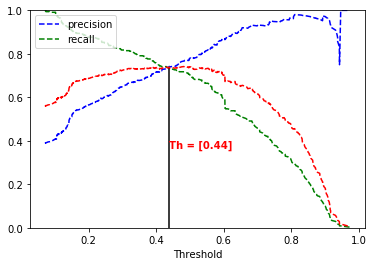

In [145]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(precision, recall, threshold)
plt.axvline(x = th[np.where(pr==rc)], ymin = 0, ymax= rc[np.where(pr==rc)],color = 'black')
plt.text(x = th[np.where(pr==rc)], y= rc[np.where(pr==rc)]/2, s = f'Th = {np.round(th[np.where(pr==rc)],2)}',\
         weight = 'heavy',color = 'red',  rotation = 'horizontal')
#plt.plot([th[np.where(pr==rc)],th[np.where(pr==rc)]],[0,rc[np.where(pr==rc)]], linestyle='--')
plt.plot(threshold, f_score[:-1], 'r--', label = 'F Score')
plt.show()

Text(1, 9, '9')

Text(2, 8, '8')

Text(3, 7, '7')

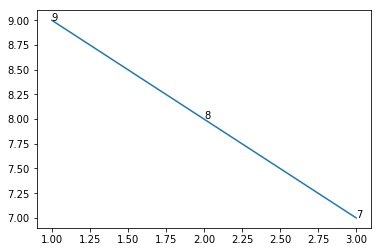

In [122]:
x=[1,2,3]
y=[9,8,7]

plt.plot(x,y)
for a,b in zip(x, y): 
    plt.text(a, b, str(b))
plt.show()

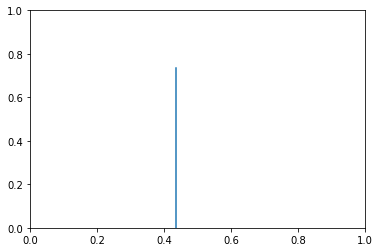

In [117]:
plt.axvline(x = th[np.where(pr==rc)], ymin = 0, ymax= rc[np.where(pr==rc)])

In [96]:
precision[-40:-1]

array([0.975     , 0.97435897, 0.97368421, 0.97297297, 0.97222222,
       0.97142857, 0.97058824, 0.96969697, 0.96875   , 0.96774194,
       0.96666667, 0.96551724, 0.96428571, 0.96296296, 0.96153846,
       0.96      , 0.95833333, 0.95652174, 0.95454545, 0.95      ,
       0.94736842, 0.94444444, 0.94117647, 0.9375    , 0.93333333,
       0.92857143, 0.92307692, 0.91666667, 0.90909091, 0.9       ,
       0.88888889, 0.875     , 0.85714286, 0.83333333, 0.8       ,
       0.75      , 1.        , 1.        , 1.        ])

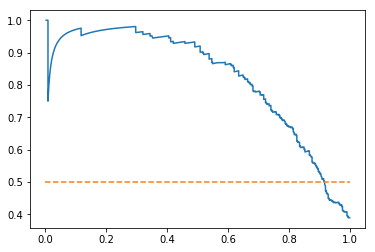

In [97]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
#https://www.programcreek.com/python/example/89259/sklearn.metrics.precision_recall_curve
_ = plt.plot(recall[:-1],precision[:-1], label='precision')
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

##### prediction on test

In [77]:
pred_test_bin = logreg.predict(test_df[features])
pred_test_prob = logreg.predict_proba(test_df[features])[:,1]
#logreg.score(test_df[features], test_df[target],)

In [85]:
pred_test_bin_sub = np.where(pred_test_prob > 0.42,1,0)#threshold[np.argmax(f_score)],1,0)
np.bincount(pred_test_bin_sub)

array([247, 171], dtype=int64)

In [86]:
# precision_score(test_df[target],pred_bin)
# recall_score(test_df[target],pred_bin)
# confusion_matrix(test_df[target],pred_bin)
# accuracy_score(test_df[target],pred_bin)

In [98]:
test_df.shape
pred_test_bin.shape

(418, 25)

(418,)

In [99]:
pd.concat([test_df[['PassengerId']],pd.DataFrame(pred_test_bin_sub,columns= ['Survived'],index = test_df.index)],axis = 1)\
.to_csv(f'{path}/titanic_submit4.csv', index=False)

In [64]:
def logreg_coef(model,data):    
    """
    Gives the intercepts and coefficients along with variable names for logistic regression.
    model : name of the logistic model
    data :  data on which logistic model was fit, column order must be same as that of the
            data on which model was fit
    """
    intercept = pd.DataFrame({'variable' : 'intercept', 'coefficient' : model.intercept_})
    coefficient = pd.DataFrame({'variable' : data.columns, 'coefficient' : model.coef_.transpose().flatten()})
    coefficient = coefficient.reindex(coefficient.coefficient.abs().sort_values(ascending = False).index)
    return(pd.concat([intercept,coefficient], axis = 0).reset_index(drop = True))

In [65]:
lr_coefs = logreg_coef(model = logreg,data = train_df[features])
lr_coefs

,variable,coefficient
0,intercept,0.072617
1,Sex=female,1.081433
2,Sex=male,-1.081419
3,Pclass=3,-0.789592
4,Pclass=1,0.671627
5,Age,-0.569885
6,SibSp=1,0.348437
7,Parch=1,0.286103
8,Embarked=S,-0.266910
9,SibSp=3,-0.264502
